## Module End Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('myexcel.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [6]:
df['Height']=np.random.randint(150,181,size=len(df))
df.fillna('',inplace=True)

In [7]:
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     152     180   
1    Jae Crowder  Boston Celtics      99       SF   25     172     235   
2   John Holland  Boston Celtics      30       SG   27     166     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     163     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     176     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University             
3      Georgia State  1148640.0  
4                     5000000.0  


##### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [8]:
team_counts=df['Team'].value_counts()
percentage_split=(team_counts/len(df))*100
team_stats=pd.DataFrame({'Team':team_counts.index,'Count': team_counts.values,'Percentage':percentage_split.values})
print(team_stats)

                      Team  Count  Percentage
0     New Orleans Pelicans     19    4.148472
1        Memphis Grizzlies     18    3.930131
2                Utah Jazz     16    3.493450
3          New York Knicks     16    3.493450
4          Milwaukee Bucks     16    3.493450
5            Brooklyn Nets     15    3.275109
6   Portland Trail Blazers     15    3.275109
7    Oklahoma City Thunder     15    3.275109
8           Denver Nuggets     15    3.275109
9       Washington Wizards     15    3.275109
10              Miami Heat     15    3.275109
11       Charlotte Hornets     15    3.275109
12           Atlanta Hawks     15    3.275109
13       San Antonio Spurs     15    3.275109
14         Houston Rockets     15    3.275109
15          Boston Celtics     15    3.275109
16          Indiana Pacers     15    3.275109
17         Detroit Pistons     15    3.275109
18     Cleveland Cavaliers     15    3.275109
19           Chicago Bulls     15    3.275109
20        Sacramento Kings     15 

##### 2.Segregate the employees w.r.t different positions.

In [10]:
position_counts=df['Position'].value_counts()
print(position_counts)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


##### 3.Find from which age group most of the employees belong to.

In [16]:
df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [12]:
df.Age.value_counts().sort_values(ascending = False).head(1)

Age
24    47
Name: count, dtype: int64

In [15]:
age_bins=[0,20,30,40,50,60,np.inf]
age_labels=['0-20','21-30','31-40','41-50','51-60','60+']
df['Age Group']=pd.cut(df['Age'],bins=age_bins,labels=age_labels,right=False)
age_group_counts=df['Age Group'].value_counts()
print(age_group_counts)

Age Group
21-30    334
31-40    119
41-50      3
0-20       2
51-60      0
60+        0
Name: count, dtype: int64


##### 4.Find out under which team and position, spending in terms of salary is high.

In [17]:
df['Salary']=pd.to_numeric(df['Salary'])
team_position_salary=df.groupby(['Team','Position'])['Salary'].sum().reset_index()
max_salary_index=team_position_salary['Salary'].idxmax()
hightest_spending_team=team_position_salary.loc[max_salary_index,'Team']
hightest_spending_position=team_position_salary.loc[max_salary_index,'Position']
print("Team with highest spending :",hightest_spending_team)
print("Postion with highest spending :",hightest_spending_position)

Team with highest spending : Los Angeles Lakers
Postion with highest spending : SF


##### 5.Find if there is any correlation between age and salary , represent it visually.

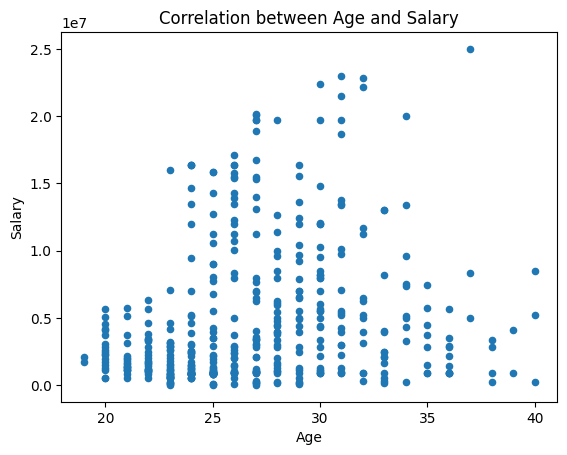

In [18]:
df.plot.scatter(x='Age',y='Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Correlation between Age and Salary')
plt.show()